# `Lecture 6 - SCB explorations`

In this lecture you will get an introduction to a package called pyscbwrapper which is a wrapper to SCBs API. Read more here

- [pyscbwrapper github](https://github.com/kirajcg/pyscbwrapper)
- [SCB API](https://www.scb.se/vara-tjanster/oppna-data/)

In [2]:
from pyscbwrapper import SCB

# instantiate an SCB instance with a language, could be sv for Swedish or en for English
scb = SCB("en")

scb.info()

[{'id': 'AA', 'type': 'l', 'text': 'General statistics'},
 {'id': 'AM', 'type': 'l', 'text': 'Labour market'},
 {'id': 'BE', 'type': 'l', 'text': 'Population'},
 {'id': 'BO', 'type': 'l', 'text': 'Housing, construction and building'},
 {'id': 'EN', 'type': 'l', 'text': 'Energy'},
 {'id': 'FM', 'type': 'l', 'text': 'Financial markets'},
 {'id': 'HA', 'type': 'l', 'text': 'Trade in goods and services'},
 {'id': 'HE', 'type': 'l', 'text': 'Household finances'},
 {'id': 'JO', 'type': 'l', 'text': 'Agriculture, forestry and fishery'},
 {'id': 'LE', 'type': 'l', 'text': 'Living conditions'},
 {'id': 'ME', 'type': 'l', 'text': 'Democracy'},
 {'id': 'MI', 'type': 'l', 'text': 'Environment'},
 {'id': 'NR', 'type': 'l', 'text': 'National accounts'},
 {'id': 'NV', 'type': 'l', 'text': 'Business activities'},
 {'id': 'OE', 'type': 'l', 'text': 'Public finances'},
 {'id': 'PR', 'type': 'l', 'text': 'Prices and Consumption'},
 {'id': 'TK', 'type': 'l', 'text': 'Transport and communications'},
 {'id'

In [11]:
# to go down different levels we add the corresponding ids to SCB
SCB("en", "MI").info()[:5]

[{'id': 'MI0106',
  'type': 'l',
  'text': 'Discharges to water and sewage sludge production'},
 {'id': 'MI0107',
  'type': 'l',
  'text': 'Greenhouse gas emissions and removals'},
 {'id': 'MI0108', 'type': 'l', 'text': 'Emissions of atmospheric pollutants'},
 {'id': 'MI0305', 'type': 'l', 'text': 'Waste, generated and treated'},
 {'id': 'MI0307', 'type': 'l', 'text': 'Waste, packaging'}]

In [12]:
SCB("en", "MI", "MI0107").info()[:5]

[{'id': 'TotaltUtslappN',
  'type': 't',
  'text': 'Total emissions and removals of greenhouse gases by greenhouse gas and sector. Year 1990 - 2021',
  'updated': '2023-03-15T08:00:00'},
 {'id': 'MI0107UppvBoLok',
  'type': 't',
  'text': 'Emissions of greenhouse gases from heating of houses and buildings by greenhouse gas and subsector. Year 1990 - 2021',
  'updated': '2023-03-15T08:00:00'},
 {'id': 'MI0107Prodanv',
  'type': 't',
  'text': 'Emissions of greenhouse gases from solvent use and other product use by greenhouse gas and area. Year 1990 - 2021',
  'updated': '2023-03-15T08:00:00'},
 {'id': 'MI0107IndustriN',
  'type': 't',
  'text': 'Emissions of greenhouse gases from industry by greenhouse gas and subsector.  Year 1990 - 2021',
  'updated': '2023-03-15T08:00:00'},
 {'id': 'MI0107JordbrukN',
  'type': 't',
  'text': 'Emissions of greenhouse gases from agriculture  by greenhouse gas and subsector. Year 1990 - 2021',
  'updated': '2023-03-15T08:00:00'}]

In [15]:
# when we see the variables key, we have come to a leaf node, and it is here we can find our data 
SCB("en", "MI", "MI0107", "TotaltUtslappN").info()

{'title': 'Total air emissions by greenhouse gas, sector, observations and year',
 'variables': [{'code': 'Vaxthusgaser',
   'text': 'greenhouse gas',
   'values': ['CO2-ekv.',
    'CO2',
    'CO2-BIO',
    'CH4',
    'N2O_CO2-ekv.',
    'CH4_CO2-ekv.',
    'N2O',
    'HFC',
    'PFC',
    'SF6',
    'SF6_CO2-ekv.'],
   'valueTexts': ['Total Greenhouse Gases (kt CO2-eqv.)',
    'Fossil Carbon Dioxide (CO2) (kt)”',
    'Biogenic carbon dioxide (CO2) from fuels (kt)',
    'Methane (CH4) (t)',
    'Nitrous Oxide (N2O) (kt CO2-eqv.)',
    'Methane (CH4) (kt CO2-eqv.)',
    'Nitrous Oxide (N2O) (t)',
    'Hydrofluorocarbons (HFCs) (kt CO2-eqv.)',
    'Perfluorocarbons (PFCs) (kt CO2-eqv.)',
    'Sulphur Hexafluoride (SF6) (kg)',
    'Sulphur Hexafluoride (SF6) (kt CO2-eqv.)']},
  {'code': 'Sektor',
   'text': 'sector',
   'values': ['0.1',
    '0.2',
    '0.3',
    '0.4',
    '1.0',
    '2.0',
    '3.0',
    '4.0',
    '8.0',
    '5.0',
    '6.0',
    '7.0',
    '9.0',
    '10.0'],
   'valu

---
## `Explore the metadata`

In [19]:
scb_emissions = SCB("en", "MI", "MI0107", "TotaltUtslappN")
emissions_info = scb_emissions.info()

emissions_info.keys()

dict_keys(['title', 'variables'])

In [21]:
emissions_info["title"]

'Total air emissions by greenhouse gas, sector, observations and year'

In [25]:
len(emissions_info["variables"])

4

In [38]:
for variable in emissions_info["variables"]:
    print(f"{variable.keys()}")

dict_keys(['code', 'text', 'values', 'valueTexts'])
dict_keys(['code', 'text', 'values', 'valueTexts'])
dict_keys(['code', 'text', 'values', 'valueTexts'])
dict_keys(['code', 'text', 'values', 'valueTexts', 'time'])


In [51]:

for i, variable in enumerate(emissions_info["variables"]):
    print(f'{i}. {variable["code"] :<15} {variable["text"]:<20} {variable["values"]}')
    

0. Vaxthusgaser    greenhouse gas       ['CO2-ekv.', 'CO2', 'CO2-BIO', 'CH4', 'N2O_CO2-ekv.', 'CH4_CO2-ekv.', 'N2O', 'HFC', 'PFC', 'SF6', 'SF6_CO2-ekv.']
1. Sektor          sector               ['0.1', '0.2', '0.3', '0.4', '1.0', '2.0', '3.0', '4.0', '8.0', '5.0', '6.0', '7.0', '9.0', '10.0']
2. ContentsCode    observations         ['0000018Q']
3. Tid             year                 ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [56]:
emissions_info["variables"][0]

{'code': 'Vaxthusgaser',
 'text': 'greenhouse gas',
 'values': ['CO2-ekv.',
  'CO2',
  'CO2-BIO',
  'CH4',
  'N2O_CO2-ekv.',
  'CH4_CO2-ekv.',
  'N2O',
  'HFC',
  'PFC',
  'SF6',
  'SF6_CO2-ekv.'],
 'valueTexts': ['Total Greenhouse Gases (kt CO2-eqv.)',
  'Fossil Carbon Dioxide (CO2) (kt)”',
  'Biogenic carbon dioxide (CO2) from fuels (kt)',
  'Methane (CH4) (t)',
  'Nitrous Oxide (N2O) (kt CO2-eqv.)',
  'Methane (CH4) (kt CO2-eqv.)',
  'Nitrous Oxide (N2O) (t)',
  'Hydrofluorocarbons (HFCs) (kt CO2-eqv.)',
  'Perfluorocarbons (PFCs) (kt CO2-eqv.)',
  'Sulphur Hexafluoride (SF6) (kg)',
  'Sulphur Hexafluoride (SF6) (kt CO2-eqv.)']}

In [82]:
scb_emissions.get_variables()["greenhouse gas"]

['Total Greenhouse Gases (kt CO2-eqv.)',
 'Fossil Carbon Dioxide (CO2) (kt)”',
 'Biogenic carbon dioxide (CO2) from fuels (kt)',
 'Methane (CH4) (t)',
 'Nitrous Oxide (N2O) (kt CO2-eqv.)',
 'Methane (CH4) (kt CO2-eqv.)',
 'Nitrous Oxide (N2O) (t)',
 'Hydrofluorocarbons (HFCs) (kt CO2-eqv.)',
 'Perfluorocarbons (PFCs) (kt CO2-eqv.)',
 'Sulphur Hexafluoride (SF6) (kg)',
 'Sulphur Hexafluoride (SF6) (kt CO2-eqv.)']

In [85]:
scb_emissions.get_variables()["sector"]

['NATIONAL TOTAL (excluding LULUCF, excluding international transports)',
 'NATIONAL TOTAL (excluding LULUCF, including international transports)',
 'NATIONAL TOTAL (including LULUCF, excluding international transports)',
 'NATIONAL TOTAL (including LULUCF, including international transports)',
 'OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL',
 'WASTE, TOTAL',
 'ELECTRICITY AND DISTRICT HEATING, TOTAL',
 'INDUSTRY, TOTAL',
 'DOMESTIC TRANSPORT, TOTAL',
 'INTERNATIONAL TRANSPORT, TOTAL',
 'AGRICULTURE, TOTAL',
 'SOLVENT USE AND OTHER PRODUCT USE, TOTAL',
 'HEATING OF HOUSES AND PREMISES, TOTAL',
 'LAND-USE, LAND-USE CHANGE AND FORESTRY (LULUCF), TOTAL']

In [61]:
scb_emissions.get_variables().keys()

dict_keys(['greenhouse gas', 'sector', 'observations', 'year'])

In [75]:
scb_emissions.get_variables()["observations"]

['Substance']

---
## `Fetch the data`

In [87]:
scb_emissions.set_query(
    **{
        "greenhouse gas": "Total Greenhouse Gases (kt CO2-eqv.)",
        "sector": "NATIONAL TOTAL (including LULUCF, including international transports)",
    }
)
# 0.4 means the sector NATIONAL TOTAL ...
co2_equivalence_data = scb_emissions.get_data()
co2_equivalence_data


{'columns': [{'code': 'Vaxthusgaser', 'text': 'greenhouse gas', 'type': 'd'},
  {'code': 'Sektor', 'text': 'sector', 'type': 'd'},
  {'code': 'Tid', 'text': 'year', 'type': 't'},
  {'code': '0000018Q', 'text': 'Substance', 'type': 'c'}],
 'comments': [],
 'data': [{'key': ['CO2-ekv.', '0.4', '1990'], 'values': ['28861.9']},
  {'key': ['CO2-ekv.', '0.4', '1991'], 'values': ['29269.2']},
  {'key': ['CO2-ekv.', '0.4', '1992'], 'values': ['30069.9']},
  {'key': ['CO2-ekv.', '0.4', '1993'], 'values': ['34527.2']},
  {'key': ['CO2-ekv.', '0.4', '1994'], 'values': ['36127.2']},
  {'key': ['CO2-ekv.', '0.4', '1995'], 'values': ['35548.5']},
  {'key': ['CO2-ekv.', '0.4', '1996'], 'values': ['37116.3']},
  {'key': ['CO2-ekv.', '0.4', '1997'], 'values': ['32242.2']},
  {'key': ['CO2-ekv.', '0.4', '1998'], 'values': ['32915.7']},
  {'key': ['CO2-ekv.', '0.4', '1999'], 'values': ['29574.1']},
  {'key': ['CO2-ekv.', '0.4', '2000'], 'values': ['26988.0']},
  {'key': ['CO2-ekv.', '0.4', '2001'], 'valu

In [84]:
co2_equivalence_data["metadata"]

[{'infofile': 'MI0107',
  'updated': '2023-03-06T13:07:00Z',
  'label': 'Total air emissions by greenhouse gas, sector, year and observations',
  'source': 'Swedish Environmental Protection Agency'}]

---
## `Clean the data`

In [88]:
import pandas as pd 

df = pd.DataFrame(co2_equivalence_data["data"])
df.head()

,key,values
0,"[CO2-ekv., 0.4, 1990]",[28861.9]
1,"[CO2-ekv., 0.4, 1991]",[29269.2]
2,"[CO2-ekv., 0.4, 1992]",[30069.9]
3,"[CO2-ekv., 0.4, 1993]",[34527.2]
4,"[CO2-ekv., 0.4, 1994]",[36127.2]


In [138]:
df_co2_ekv = df[df["key"].apply(lambda row: row[0] == "CO2-ekv.")]
df_co2_ekv.index = df_co2_ekv["key"].apply(lambda row: int(row[-1]))

df_co2_ekv = pd.DataFrame(df_co2_ekv["values"].apply(lambda row: float(row[0])))

df_co2_ekv.index.names = ["year"]
df_co2_ekv.rename(columns = {"values":"CO2_ekv_kilotons"}, inplace=True)
df_co2_ekv.head()

,CO2_ekv_kilotons
year,
1990,28861.9
1991,29269.2
1992,30069.9
1993,34527.2
1994,36127.2


<Axes: title={'center': 'CO equivalence in Sweden (kt) incl. international transports'}, xlabel='year'>

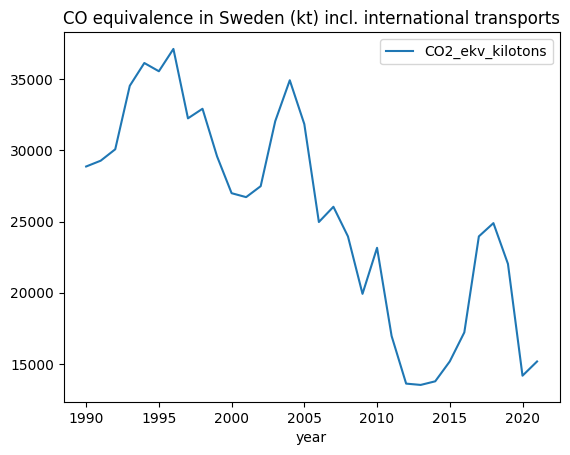

In [140]:
df_co2_ekv.plot(title = "CO equivalence in Sweden (kt) incl. international transports")

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
